In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the DataFrame

In [46]:
#Read the file
df = pd.read_csv("attacks.csv", encoding="latin-1")

# General information of the DataFrame

In [47]:
# Number of rows and columns
df.shape

(25723, 24)

In [48]:
# Name of each column
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Observations:
- There are two columns (Case Number.1 and Case Number.2) that have the same name as Case Number, maybe they have the same information
- Other two columns (href and href formula) that may have similar data
- Two columns called Unnamed

In [49]:
# Data types in each column 
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

Observations:
- All columns have object data type except the year and the original order

In [50]:
# Visualize all the data
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- There are a lot of rows which have all null data

# Operations to clean the DataFrame

## Year Column

In [51]:
# Replace the 0 values in the Year column by the values on the Date column that have the year
'''
def corrected_year(row):
    if row["Year"]==0.0:
#         return row["Date"]
    else:
        return row["Year"]
    
df["Year"]=df.apply(corrected_year, axis=1)

'''
# I finally decided not to replace them because if I replaced them I could not work with these values afterwards

'\ndef corrected_year(row):\n    if row["Year"]==0.0:\n#         return row["Date"]\n    else:\n        return row["Year"]\n    \ndf["Year"]=df.apply(corrected_year, axis=1)\n\n'

## Case number column

In [52]:
# Check if the columns Case Number.1 and Case Number.2 have the same information and check if they are equal to Case Number
a=df["Case Number"].equals(df["Case Number.1"])
b=df["Case Number"].equals(df["Case Number.2"])
c=df["Case Number.1"].equals(df["Case Number.2"])
print(a,b,c)

False False False


Result: They do not have the same data

In [53]:
# Check if the difference in the data between the columns Case Number.2 and Case Number.1 is very high.
df["Case Number.1"].isin(df["Case Number.2"]).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

Result: There are few different entries, so I delete the column Case Number.2 so that I do not have duplicates

In [54]:
# Delete column Case Number.2
df_clean=df.drop(labels="Case Number.2", axis=1)

In [55]:
# Check if the difference in the data between the columns Case Number.1 and Case Number is very high.
df["Case Number.1"].isin(df["Case Number"]).value_counts()

True     25700
False       23
Name: Case Number.1, dtype: int64

Result: There are few different entries, so I delete the column Case Number.1 so that I do not have duplicates

In [56]:
# Delete column Case Number.1
df_clean=df_clean.drop(labels="Case Number.1", axis=1)


## Columns href and href formula

In [57]:
# Check if the columns href and href formula have the same information
df_clean["href"].equals(df_clean["href formula"])

False

Result: The do not have the same information

In [58]:
# Check the difference in the data between href and href formula
df_clean["href"].isin(df_clean["href formula"]).value_counts()

True     25666
False       57
Name: href, dtype: int64

Result: few different data so I delete the column href formula

In [59]:
# Delete href formula
df_clean=df_clean.drop(labels="href formula", axis=1)

## Columns and rows with null data

In [60]:
# Check how many nulls are in each column
column_null=df.isnull().sum()
column_null

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

Observation: the columns Unnamed22 and Unnamed23 have many null entries (almost all of them), I delete them as I won't get much information from them.

In [61]:
#Delete columns that have more than 8000 null entries (have at least 600 non null values) which are columns Unnamed22 y Unnamed23
df_clean=df_clean.dropna(axis=1, how="all", thresh=600)

In [62]:
# I also delete the columns Time and Age as they have many values missing and won't be used for the hypothesis
df_clean=df_clean.drop(labels="Time", axis=1)
df_clean=df_clean.drop(labels="Age", axis=1)

In [63]:
# There are rows with all null entries as I saw above, so I delete these rows as they won't give relevant information
df_cleanl=df_clean.dropna(how="all")

In [64]:
#To prove the hypothesis I will get rid of rows with null data in the columns of interest.
df_clean=df_clean.dropna(how="all", subset=["Date", "Year", "Country", "Activity", "Fatal (Y/N)"])

## Type column

In [65]:
#Check the different entries in that column
set(df_clean["Type"])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

Observation: there are 3 names that stand for the same type of attack, I merge all in one name

In [66]:
# Replace boating and boatomg by boat
df_clean= df_clean.replace({"Boating":"Boat", "Boatomg": "Boat"})
df_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Name and Sex column

In [67]:
# There are several entries in the Name column from the Sex column, I check if these entries match to the ones in the Sex column
df_clean.loc[(df_clean["Name"]=="male")]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6296.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,Minor injury to foot,N,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6294.0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,Minor bite to hand by captive shark. PROVOKED ...,N,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6293.0
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,"Minor injury, marks on board",N,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,ND.0030,Before 1905,0.0,Unprovoked,BURMA,NaN,NaN,Bathing,male,M,Fatal x 2,Y,NaN,"Massillon Independent, 3/1905",ND-0030-Burma.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,30.0
6285,ND.0017,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,FATAL,Y,NaN,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,18.0
6286,ND.0016,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,4 men were bathing,male,M,FATAL,Y,NaN,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0016- Durban-PostOffice.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,17.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0


In [68]:
# I can not be sure by only seen this data, so as there can be different data in Name and Sex columns I make the data in Sex be the same that the data in Name
def corrected_sex(row):
    if row["Name"]=="male":
        return "M"
    elif row["Name"]=="female":
        return "F"
    else:
        return row["Sex "]
    
df_clean["Sex "]=df_clean.apply(corrected_sex, axis=1)

In [69]:
#I realized the Sex column has an empty space at the end of its name, so I delete it
df_clean.rename(columns={"Sex ": "Sex"})

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Fatal column

In [70]:
# Check the column values
set(df_clean["Fatal (Y/N)"])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

Observations: There are values that refer to the same but because of the way they are written they are not recognized as the same, so I replace them by their true values, and also replace the NaN by UNKNOWN. There is a confusing value (2017) that does not correspond to this column.

In [71]:
# Replace names
df_clean["Fatal (Y/N)"].replace({" N":"N", "N ": "N", "y":"Y", "M": "N"}, inplace=True)
df_clean["Fatal (Y/N)"].fillna(("UNKNOWN"), inplace=True)

In [72]:
#Search for the value 2017 in the data
df_clean.loc[df_clean['Fatal (Y/N)']== "2017"]
# As it can be seen on the other columns it was a non fatal attack, so I replce the value 2017 by N

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,Lower left leg injured PROVOKED ACCIDENT,2017,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5517.0


In [73]:
df_clean["Fatal (Y/N)"].replace({"2017":"N"}, inplace=True)


## Species column

In [74]:
# Check the different entries in this column
set(df_clean["Species "])

{nan,
 "Tiger shark, 4.6 m [15'] ",
 'White shark, 3m, seen in area and hooked 3 days later',
 "Lemon shark, 2.7 m [9'] ",
 'Shark involvement prior to death was not confirmed',
 'Sevengill shark, 2.4 m',
 '234-lb shark',
 "Goblin shark, 4.2'",
 'White shark, 2.7 m [9\'1"], 750-lb ',
 'Possibly a small blacktip shark',
 'Lemon shark, 1164 mm, immature male, identified by  V.G. Springer',
 'Shark involvement not confirmed; thought to be a barracuda bite',
 'Bull shark, 4 m',
 "White shark, 4.9 m [16']",
 "Nurse shark, 2.5' ",
 "Possibly a 10' bull shark",
 'C. macrurus captured 48 hours after attack with tissue removed from man in its gut; species identified by G.P. Whitley,  reported as C. obscurus by  R. Steel',
 '1.8 to 2 m C. albimarginatus',
 'Shark involvement not confirmed, injury may have been caused by a bluefish',
 "16' shark",
 'Wobbegong shark, 2m',
 "White shark, 3.8 m [12.5']  ",
 "3.5 m [11.5'] shark",
 "Hammerhead shark. 6' to 7'",
 'Bull shark, 1.3 m',
 '3 sharks',
 "3'

In [75]:
#The name of this column has also an empty space at the end so I rename it
df_clean.rename(columns={"Species ": "Species"})

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


## Hypothesis 1

There are less fatal attacks due to surfing than to fishing, although the number of total attacks is higher in surfing.

This could be due to the fact that when fishermen are fishing are disturbing the environment of the fish including sharks, but while surfing the human is not disturbing their habitat

In [76]:
#Check the number of attacks while surfing and while fishing, it can be seen that there are more attacks while surfing.
df_clean["Activity"].value_counts()

Surfing                                                                                           971
Swimming                                                                                          869
Fishing                                                                                           431
Spearfishing                                                                                      333
Bathing                                                                                           162
                                                                                                 ... 
Disappeared 11 days earlier, probable homicide victim                                               1
Sinking of the ferryboat Bongbong 1                                                                 1
The 240-ton motor vessel Pilar II with 100 people on board capsized in high winds & rough seas      1
Fell off aircraft carrier                                                         

<AxesSubplot:xlabel='count', ylabel='Fatal (Y/N)'>

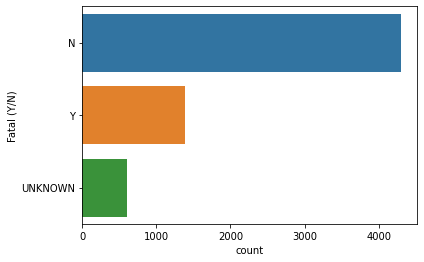

In [77]:
# Plot a graph to check whether the majority of the attacks are fatal or not.
sns.countplot(y="Fatal (Y/N)", data=df_clean)


Result: The majority are non fatal attacks

In [78]:
# Check the number of fatal attacks while surfing
df_clean[df_clean["Activity"]=="Surfing"]["Fatal (Y/N)"].value_counts()

N          878
Y           49
UNKNOWN     44
Name: Fatal (Y/N), dtype: int64

In [79]:
# Check the number of fatal attacks while fishing
df_clean[df_clean["Activity"]=="Fishing"]["Fatal (Y/N)"].value_counts()


N          362
Y           47
UNKNOWN     22
Name: Fatal (Y/N), dtype: int64

In [80]:
# Create a new DataFrame with data from surfing and fishing activities
df1= df_clean.drop(df_clean[df_clean["Activity"] != "Surfing"].index)
df1
df2= df_clean.drop(df_clean[df_clean["Activity"] != "Fishing"].index)
df2
df3=pd.concat([df1,df2])
df3

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href,original order
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,"Minor injury, marks on board",N,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6288.0
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,"No injury, surfboard damaged",N,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6287.0
19,2018.04.28.a,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,"No injury, knocked off board by shark",N,NaN,"B. Myatt, GSAF",2018.04.28.a-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,ND.0019,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,2-inch lacerations,N,NaN,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,20.0
6289,ND.0013,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,"FATAL, body not recovered but shark was caught...",Y,NaN,"Rural New Yorker, 7/19/1913",ND-0013-Durban-native-fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,14.0
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,"FATAL, knocked overboard by tail of shark & ca...",Y,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,10.0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,FATAL,Y,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,9.0


In [81]:
# Create a new DataFrame with data from Fatal (Y/N) and the activities surfing and fishing.
# Compute a simple cross tabulation of two factors 
pd.crosstab(index=df3["Fatal (Y/N)"], columns=df3["Activity"])

Activity,Fishing,Surfing
Fatal (Y/N),,
N,362,878
UNKNOWN,22,44
Y,47,49


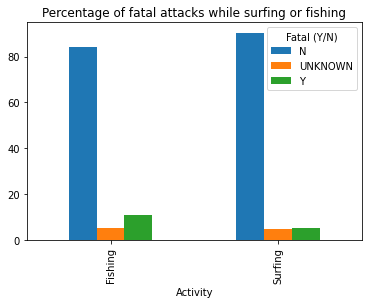

In [82]:
# Plot a graph to see if there are more fatal attacks while surfing or fishing

plot = pd.crosstab(index=df3["Activity"],
            columns=df3["Fatal (Y/N)"]).apply(lambda r: r/r.sum() *100, axis=1).plot(kind="bar", title="Percentage of fatal attacks while surfing or fishing")

Result: There are more fatal shark attacks while fishing than while surfing

## Hypothesis 2

The shark attacks increase with the years but their fatality decreases, this could be due to the overpopulation as there are more probabilities of an attack where there is more population or because some data is missing from the previous years, as in the DataFrame there was data without a year assigned.

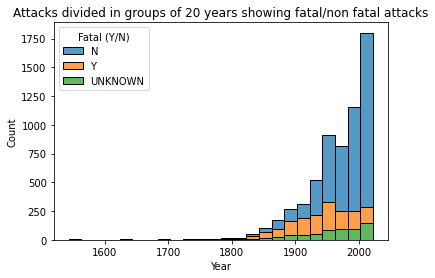

In [83]:
# Create a new set of data without the years that are below 1500 as the other years are 0 in the DataFrame
df4=df_clean[df_clean.Year > 1500]
df4
#Plot showing the attacks each 20 years, depending on if they were fatal or not.
sns.histplot(x="Year", data=df4, binwidth=20, hue="Fatal (Y/N)", multiple="stack").set_title("Attacks divided in groups of 20 years showing fatal/non fatal attacks")
plt.show()

Result: The number of attacks increases with the years, with the highest increase from the year 2000 on. However, the number of fatal attacks keeps almost constant with the years, being the majority of the attacks from the year 1950 non fatal.

## Hypothesis 3

Area from Australia where there are more attacks is in the area facing the Pacific Ocean (New South Wales and Queensland)

In [50]:
df5=df_clean[df_clean.Country == "AUSTRALIA"]
a=df_clean[df_clean["Country"]=="AUSTRALIA"]["Area"].value_counts()
a

New South Wales                         486
Queensland                              311
Western Australia                       189
South Australia                         104
Victoria                                 90
Torres Strait                            70
Tasmania                                 41
Northern Territory                       23
Westerm Australia                         3
Torres Strait                             2
Victoria                                  2
Norfolk Island                            1
Territory of Cocos (Keeling) Islands      1
Queensland                                1
Name: Area, dtype: int64

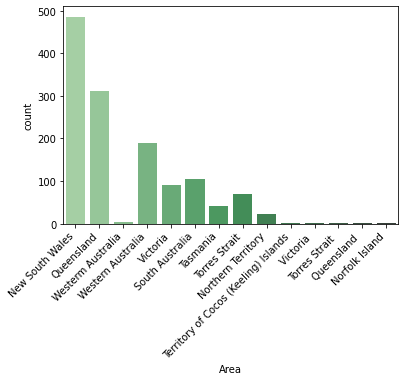

In [51]:
g=sns.countplot(x="Area", data=df5, palette="Greens_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Exporting the data

In [42]:
df_clean.to_csv("attacks_clean.csv")